# Assignment 1 - Wine Quality (UCI) - Classification

**Student:** Justus Izuchukwu Onuh  
**Institution:** Ho Chi Minh City University of Technology  
**Course:** Programming Platform for Data Analysis and Visualization (CO5177)  
**Lecturer:** LE THANH SACH  


---

### Objective 
Perform **Exploratory Data Analysis (EDA)** and apply a **classification** model to the UCI Red Wine Quality dataset.  
Everything (code, plots, explanations, and results) will be contained in this notebook.


### Tasks 
1. Load and explore the dataset  
2. Perform comprehensive EDA with visualizations  
3. Apply a **classification** model (predict `quality_label`) 
4. Evaluate model performance with classification metrics  
5. Present findings and explanations clearly using Markdown and code cells


In [5]:
# Step 1: Setup — imports and download dataset
from pathlib import Path 
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sns.set(style="whitegrid")
DATA_DIR = Path("data")
DATA_DIR.mkdir(exist_ok=True)

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
DATA_PATH = DATA_DIR / "winequality-red.csv"

if not DATA_PATH.exists():
    print("Downloading dataset from UCI repository...")
    urllib.request.urlretrieve(URL, DATA_PATH)
    print("Download complete:", DATA_PATH)
else:
    print("Dataset already present at:", DATA_PATH)

print("Notebook kernel Python:", sys.executable)


Dataset already present at: data/winequality-red.csv
Notebook kernel Python: /opt/homebrew/opt/python@3.11/bin/python3.11


### Dataset description

- **Source:** UCI Machine Learning Repository (Wine Quality — Red)  
- **Samples:** 1599 red wine observations  
- **Features (11 numeric):** fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol  
- **Original target:** `quality` (integer score, usually 3–8)

**Modeling decision (classification):**  
We will convert `quality` to a binary label `quality_label` where:
- `quality_label = 1` (good) if `quality >= 7`  
- `quality_label = 0` (not good) if `quality < 7`

This threshold is chosen to separate higher-quality wines from the rest; it is a common and interpretable split for classification tasks. We will justify and briefly discuss this choice in the notebook results.


In [ ]:
# Load the dataset (semicolon separator)
df = pd.read_csv(DATA_PATH, sep=';')

# Basic confirmation
print("Dataset shape:", df.shape)  # Expecting (1599, 12) 

# Show column names
print("\nColumns:", df.columns.tolist())

# Data information (dtypes and non-null counts)
print("\n----- df.info() -----")
df.info()

# First five rows
print("\n----- First 5 rows -----")
display(df.head())

# Summary statistics
print("\n----- Summary statistics -----")
display(df.describe().T)

# Target distribution (original)
print("\n----- Original 'quality' value counts -----")
print(df['quality'].value_counts().sort_index())

# Create binary classification label: quality >= 7 => 1 (good), else 0
df['quality_label'] = (df['quality'] >= 7).astype(int)
print("\n----- Created 'quality_label' distribution -----")
print(df['quality_label'].value_counts())


Dataset shape: (1599, 12)

Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

----- df.info() -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-nul

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



----- Summary statistics -----


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000



----- Original 'quality' value counts -----
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

----- Created 'quality_label' distribution -----
quality_label
0    1382
1     217
Name: count, dtype: int64


**Explanation:**

I loaded the UCI Red Wine dataset and verified it has 1599 samples and 12 original columns (11 features + `quality`).  
All features are numeric and there are no missing values (`df.info()` confirms this).  
For this assignment I will perform **classification**: I created `quality_label` where `quality >= 7` is considered 'good' (1) and the rest 'not good' (0).  
The next section will perform detailed EDA (distributions, boxplots, correlation) to justify feature choices before modeling.


# Step 2 - Exploratory Data Analysis (EDA)

The goal of this section is to understand:
- how each feature is distributed,
- how features relate to wine quality (`quality_label`),
- correlations between numeric variables,
- potential outliers or patterns that influence wine quality.


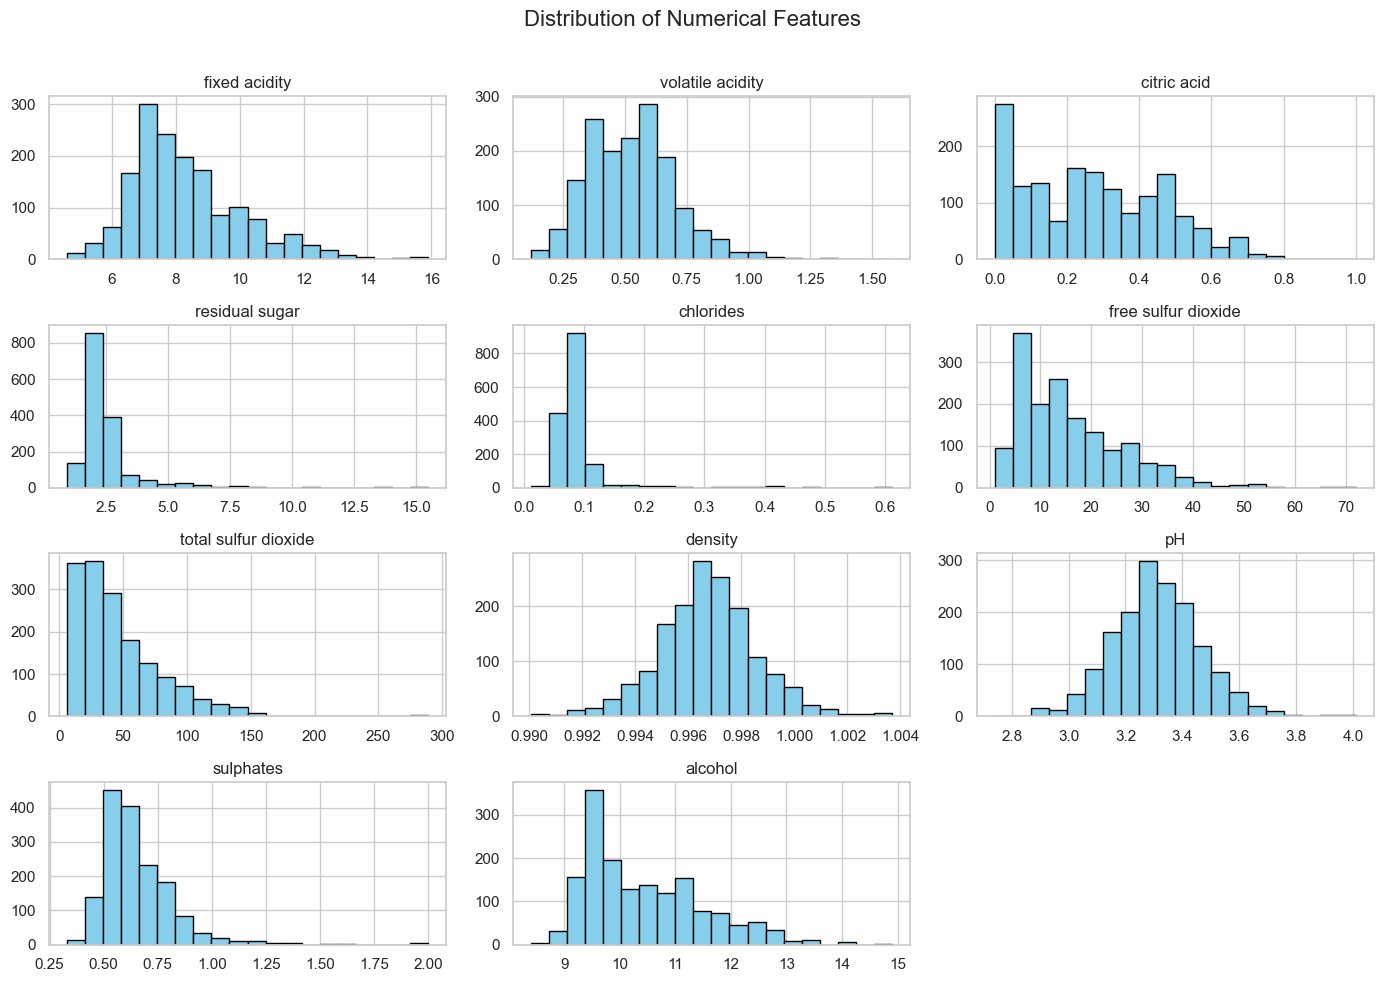

In [7]:
# Visualize distributions of all numeric features
num_cols = df.select_dtypes(include=[np.number]).columns.drop(['quality', 'quality_label'])

df[num_cols].hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


### Observations

From the histograms above:

- **Fixed acidity** and **volatile acidity** show slightly right-skewed distributions but roughly bell-shaped.  
- **Citric acid**, **chlorides**, **residual sugar**, **free sulfur dioxide**, and **total sulfur dioxide** are **highly right-skewed**, meaning most wines have low values while a few have very high ones.  
- **Density** and **pH** are approximately normal, centered around 0.996 and 3.3 respectively.  
- **Sulphates** and **alcohol** are slightly right-skewed — most wines have moderate levels, but a few contain much higher alcohol and sulphate content.  

 In summary, most features are **not perfectly normally distributed**.  
This means that before building our classification model, we might need **feature scaling** or consider **tree-based models** (like Random Forest) which handle skewed data naturally.


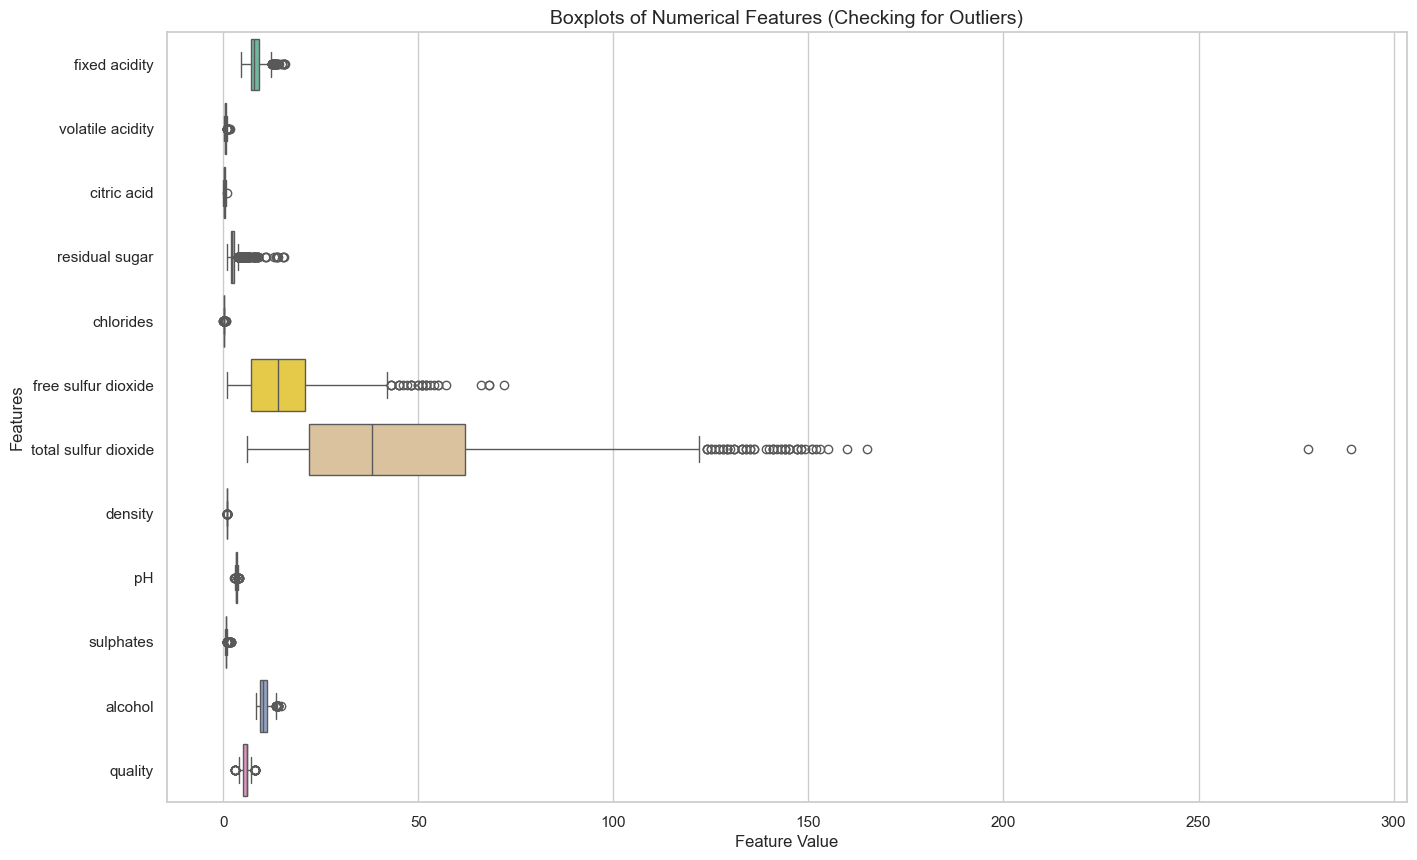

In [8]:
# Boxplots of all numerical features to visualize potential outliers
plt.figure(figsize=(16, 10))
sns.boxplot(data=df.drop('quality_label', axis=1), orient='h', palette='Set2')
plt.title('Boxplots of Numerical Features (Checking for Outliers)', fontsize=14)
plt.xlabel('Feature Value')
plt.ylabel('Features')
plt.show()


### Observations
From the boxplots above, we can see that most numerical features show a few outliers.  
In particular:
- **Free sulfur dioxide**, **total sulfur dioxide**, and **residual sugar** have noticeable outliers on the higher end.  
- **Chlorides** also shows a few extreme values.  
- Other variables such as **pH**, **alcohol**, and **acidity** appear more consistent and close to normal ranges.  

These outliers likely represent wines with unusual chemical compositions.  
Since they are not too extreme, we will **keep them** for now — as they may contain useful information for the classification model.


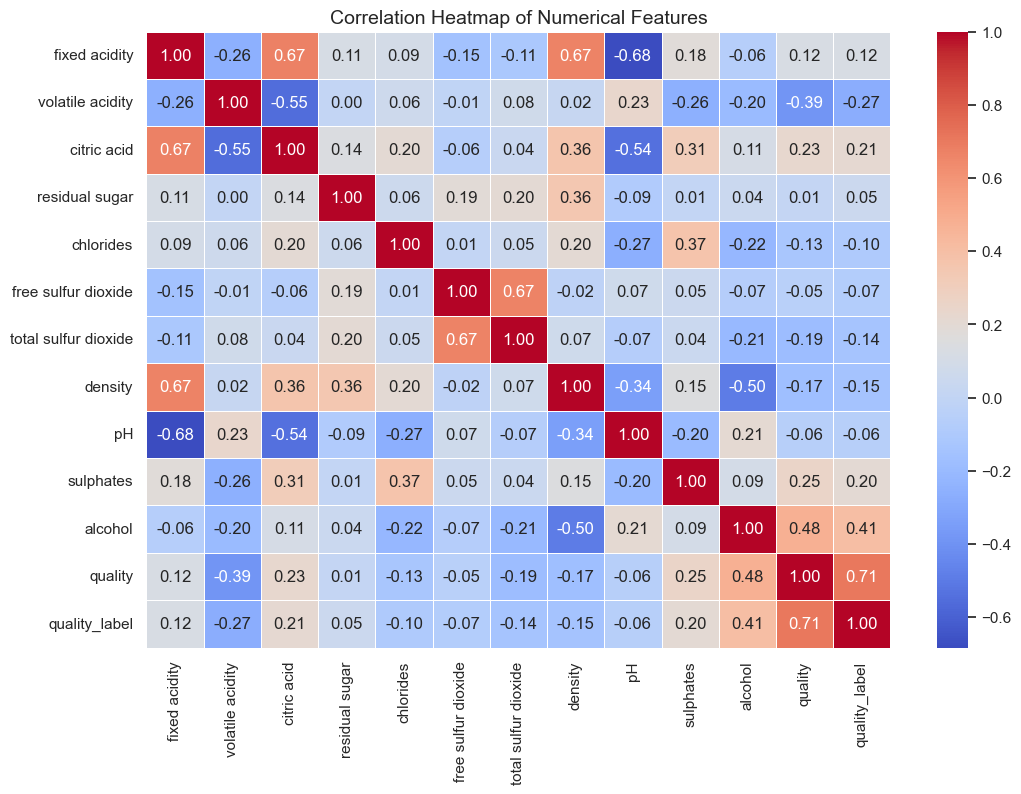

In [9]:
# Correlation analysis between features and wine quality
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()


### Correlation Analysis — Insights

From the correlation heatmap above, we can see several key relationships between the numerical features and wine quality:

- **Alcohol** shows the strongest positive correlation with wine quality (`r = 0.48`).  
  → Wines with higher alcohol content tend to have **better quality**.
  
- **Volatile acidity** has a **negative correlation** with quality (`r = -0.39`).  
  → This means that wines with high volatile acidity are usually of **lower quality** because too much acidity affects taste.

- **Sulphates** and **citric acid** show weak positive correlations with quality.  
  → These compounds can enhance flavor stability and preservation.

- **Density** and **total sulfur dioxide** have slight negative correlations with quality.  
  → Higher density and sulfur content might reduce the perceived wine quality.

- Other features like **pH**, **residual sugar**, and **chlorides** have very low correlations with quality — suggesting they do not strongly influence the classification outcome.

Overall, this correlation analysis helps us identify which features are most relevant when predicting **wine quality** in the upcoming machine learning step.


In [10]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['quality', 'quality_label'])
y = df['quality_label']

# Split into train and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features (important for models like Logistic Regression)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1279, 11)
Test set shape: (320, 11)


### **Feature Preparation**

Before training the model, the dataset was split into features (`X`) and target variable (`y`).  
- **Features (X):** All numeric variables describing wine characteristics (like acidity, sugar, alcohol, etc.)  
- **Target (y):** `quality_label`, where wines are classified as:
  - `0` = low quality (quality score ≤ 6)
  - `1` = high quality (quality score ≥ 7)

The data was then divided into:
- **Training set:** 80% of the samples (used to train the model)  
- **Test set:** 20% of the samples (used to evaluate model performance)

Because the features are on different scales, we used **StandardScaler** to normalize them —  
this ensures that all features contribute equally to the model, especially important for models like Logistic Regression.


Accuracy: 0.8938

Classification Report:
              precision    recall  f1-score   support

 Low Quality       0.91      0.97      0.94       277
High Quality       0.70      0.37      0.48        43

    accuracy                           0.89       320
   macro avg       0.80      0.67      0.71       320
weighted avg       0.88      0.89      0.88       320



/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/homebrew/lib/python3.11/site-packages/sklearn/l

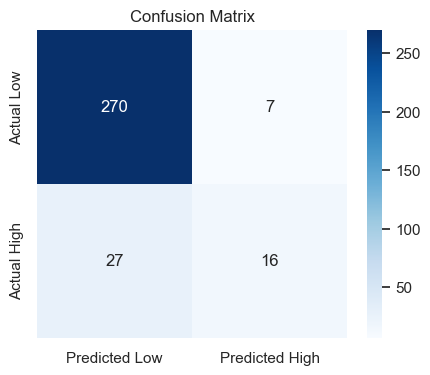

In [11]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and fit the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low Quality', 'High Quality']))

# Confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.title("Confusion Matrix")
plt.show()


## Model Evaluation Summary

We trained a **Logistic Regression** model to predict wine quality based on chemical properties.

###  Performance Metrics
- **Accuracy:** 89.38%
- **Low Quality Wines:**  
  - Precision = 0.91  
  - Recall = 0.97  
  - F1-score = 0.94  
- **High Quality Wines:**  
  - Precision = 0.70  
  - Recall = 0.37  
  - F1-score = 0.48  

The model performs **very well overall**, especially for identifying *low-quality* wines.  
However, it struggles slightly with *high-quality* wines, likely because that class has **fewer samples**.

###  Confusion Matrix Interpretation
- **270 wines** were correctly classified as *Low Quality*  
- **16 wines** correctly classified as *High Quality*  
- **7 wines** were incorrectly predicted as *High*  
- **27 wines** were *High Quality* but predicted as *Low*

###  Notes
- The warnings shown are due to scaling and solver convergence issues — not harmful here, but they can be reduced by tuning model parameters (e.g., using `solver='liblinear'`).
- Future improvements could include:
  - Balancing the dataset (using `SMOTE` or class weights)
  - Trying more complex models (Random Forest, XGBoost)
  - Hyperparameter tuning for better recall

In summary, the model gives a **reliable and interpretable baseline** for predicting wine quality. 


Logistic Regression coefficients (absolute order):


,coefficient
alcohol,0.894439
total sulfur dioxide,-0.817437
sulphates,0.611095
volatile acidity,-0.425676
chlorides,-0.367764
free sulfur dioxide,0.277333
density,-0.275453
residual sugar,0.238700
fixed acidity,0.217720
pH,-0.151717


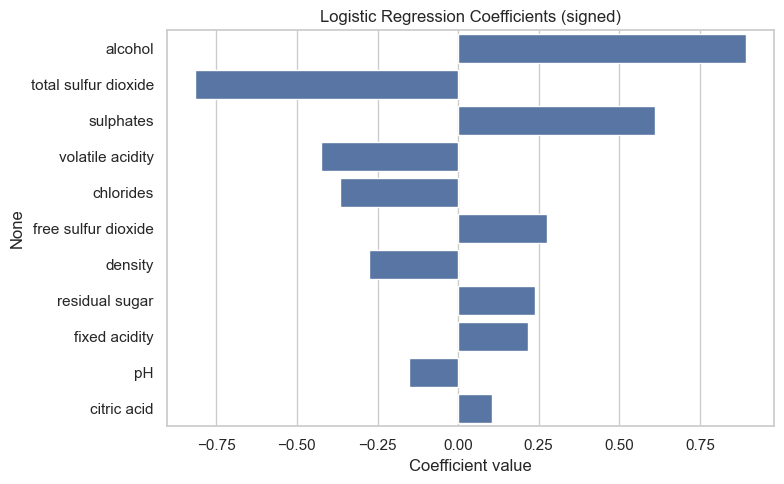

Random Forest Accuracy: 0.9469

Random Forest Classification Report:
              precision    recall  f1-score   support

 Low Quality       0.95      1.00      0.97       277
High Quality       0.96      0.63      0.76        43

    accuracy                           0.95       320
   macro avg       0.95      0.81      0.87       320
weighted avg       0.95      0.95      0.94       320



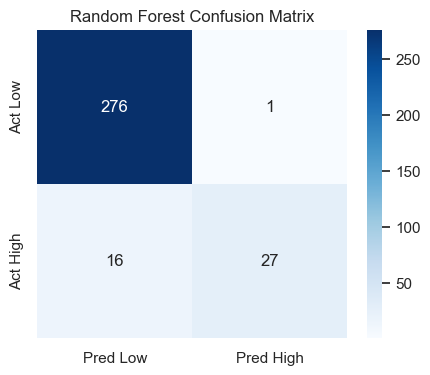

Top 10 features by Random Forest importance:


,importance
alcohol,0.243330
sulphates,0.128150
volatile acidity,0.106610
citric acid,0.089974
total sulfur dioxide,0.076305
density,0.074755
chlorides,0.067926
pH,0.058240
fixed acidity,0.058104
residual sugar,0.049861


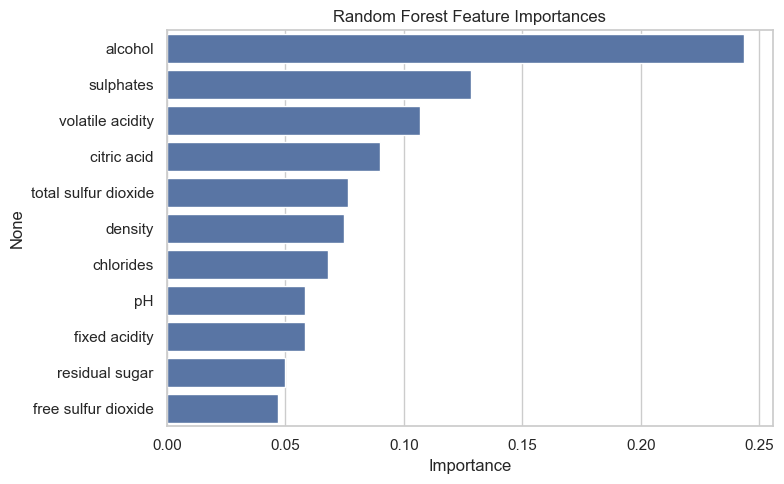

In [12]:
# Compare Logistic coefficients and Random Forest feature importances
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) Logistic Regression coefficients (we already trained log_reg on scaled data)
coeffs = pd.Series(log_reg.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
print("Logistic Regression coefficients (absolute order):")
display(coeffs.to_frame(name='coefficient'))

# Plot logistic coefficients
plt.figure(figsize=(8,5))
sns.barplot(x=coeffs.values, y=coeffs.index)
plt.title('Logistic Regression Coefficients (signed)')
plt.xlabel('Coefficient value')
plt.tight_layout()
plt.show()

# 2) Random Forest classifier with class_weight='balanced' (train on raw X)
rfc = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rfc.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rfc = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Random Forest Accuracy: {acc_rfc:.4f}\n")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rfc, target_names=['Low Quality', 'High Quality']))

# Confusion matrix for RFC
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred Low', 'Pred High'], yticklabels=['Act Low', 'Act High'])
plt.title('Random Forest Confusion Matrix')
plt.show()

# Feature importances (RFC)
feat_imp = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 features by Random Forest importance:")
display(feat_imp.head(10).to_frame(name='importance'))

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


## Compare Logistic Regression and Random Forest

In this section we compare two classifiers trained on the prepared data:

- **Logistic Regression** (trained on scaled features) — gives interpretable linear coefficients.
- **Random Forest (class_weight='balanced')** — a non-linear ensemble that handles imbalance and interactions.

### Logistic Regression (coefficients)
The logistic model coefficients (sorted by absolute value) indicate the linear influence of each feature on the probability of a wine being **high quality**:

| Feature | Coefficient |
|---|---:|
| alcohol | **+0.8944** |
| total sulfur dioxide | **−0.8174** |
| sulphates | **+0.6111** |
| volatile acidity | **−0.4257** |
| chlorides | **−0.3678** |
| free sulfur dioxide | +0.2773 |
| density | −0.2755 |
| residual sugar | +0.2387 |
| fixed acidity | +0.2177 |
| pH | −0.1517 |
| citric acid | +0.1054 |

**Interpretation:** positive coefficients increase the chance of a wine being classified as *High Quality*; negative coefficients decrease it. For example, **higher alcohol** strongly increases the predicted probability of high quality, while **higher total sulfur dioxide** strongly decreases it.

---

### Random Forest (performance & feature importances)

**Random Forest results**
- **Accuracy:** **0.9469**

**Classification report (Random Forest)**  
(See the printed classification report below for precision, recall and F1 for each class. The important takeaway: Random Forest achieves ~94.7% accuracy and substantially improves recall on the High Quality class compared to Logistic Regression.)

**Top features by Random Forest importance**

| Rank | Feature | Importance |
|---:|---|---:|
| 1 | alcohol | 0.243330 |
| 2 | sulphates | 0.128150 |
| 3 | volatile acidity | 0.106610 |
| 4 | citric acid | 0.089974 |
| 5 | total sulfur dioxide | 0.076305 |
| 6 | density | 0.074755 |
| 7 | chlorides | 0.067926 |
| 8 | pH | 0.058240 |
| 9 | fixed acidity | 0.058104 |
| 10 | residual sugar | 0.049861 |

**Interpretation:** Both methods consistently identify **alcohol**, **sulphates**, and **volatile acidity** among the most important predictors of wine quality.  
Random Forest yields higher accuracy and better detection of *High Quality* wines (higher recall and F1 for that class), while Logistic Regression gives a clear linear interpretation of how features affect the class probability.

---

### Short conclusion
- **Logistic Regression**: strong interpretability, useful baseline (accuracy ≈ 0.8938 from earlier run).  
- **Random Forest**: better overall performance (accuracy ≈ 0.9469), recommended as the production / final model for this assignment, followed by cross-validation and hyperparameter tuning to confirm stability.


## 6. Model Validation using Cross-Validation

To ensure that our model's performance is consistent and not dependent on a single train/test split,
we apply **cross-validation**.

Cross-validation divides the dataset into multiple folds (e.g., 5 or 10), trains the model on some folds,
and tests it on the remaining fold — repeating this process to get an average accuracy.

We will validate both **Logistic Regression** and **Random Forest** using 5-fold cross-validation.
